## Hypothesis Testing - Task 9


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [3]:
# z_score for sampling distributions

def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

## Hypothesis Testing Explanation
Step - 1:  
Alternate Hypothesis (Bold claim): $ H_1 \Rightarrow >, <, \neq  $  
Null Hypothesis (Status Quo): $ H_0 \Rightarrow \leq, \geq, = $

Step - 2:  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3:
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide significance level $ \alpha $

Step - 5.1: Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept H_1 \ or \ Reject H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept H_1 \ or \ Reject H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept H_1 \ or \ Reject H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept H_1 \ or \ Reject H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept H_1 \ or \ Reject H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept H_1 \ or \ Reject H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept H_1 \ or \ Reject H_0 $$

In [ ]:
'''
Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani 
(also mentioned on the label of packet). 
You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. 
How do you prove your claim? 
'''

Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \mu \neq 500 $$
Null Hypothesis (Status Quo): $$ H_0: \mu = 500 $$

Step - 2:  
* Collect a sample of size n = 10 $$ [475, 210, 450, 490, 480, 466, 440, 515, 503, 555] $$
* Compute sample mean $$ \bar{x} = 458.4 $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ = 0.05

Step - 5.1: Two tailed z-test: $$ reject H_0 if |z| > z_\frac{\alpha}{2} $$

Step - 5.2: Compute p-value

In [4]:
l = [475, 210, 450, 490, 480, 466, 440, 515, 503, 555]

sum(l)/len(l)

458.4

In [5]:
# Two Tail - Calculating the z-critical value

alpha = 1 - 0.95

z_critical = norm.ppf(1 - alpha/2) # Two tailed Z score for 95% Confidence Level

print(z_critical)

1.959963984540054


In [7]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 458.4
pop_mean = 500
pop_std = 88.56

In [8]:
# Calculating the z-score

z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

-1.4854420806572342


Text(458.4, 0.0007, 'x_bar')

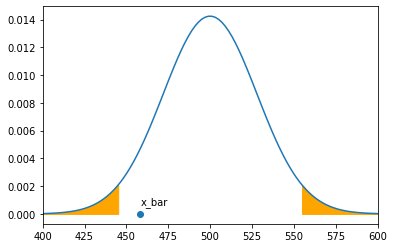

In [9]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
z_critical_left = pop_mean + (-z_critical * std)
z_critical_right = pop_mean + (z_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(z_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [10]:
# Conclusion using z test

if(np.abs(z) > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [11]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(z)))

print("p_value = ", p_value)

if(p_value < 0.05):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.13742675548939753
Fail to reject Null Hypothesis


In [ ]:
'''
Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. 
You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. 
How do you prove this to your client? 
'''

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \mu > 4 $$
Null Hypothesis (Status Quo): $$ H_0: \mu \leq 4 $$

Step - 2:  
* Collect a sample of size n = 20 $$ [4, 2, 5, 3, 5, 3, 5, 5, 4, 3, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
* Compute sample mean $$ \bar{x} = 4.2 $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: Right tailed z-test: $$ reject H_0 if ? $$

Step - 5.2: Compute p-value

In [19]:
l = [4, 2, 5, 3, 5, 3, 5, 5, 4, 3, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
sum(l)/len(l)

4.2

In [20]:
# One Tail - Calculating the z-critical value

alpha = 1-0.95

z_critical = norm.ppf(1 - alpha)

print(z_critical)

1.6448536269514722


In [21]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 4.2
pop_mean = 4
pop_std = 0.87

In [22]:
# Calculating the z-score

z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

1.028077231034387


Text(4.2, 0.1, 'x_bar')

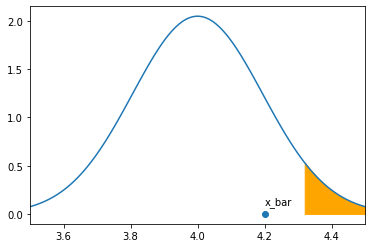

In [23]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
z_critical_right = pop_mean + (z_critical * std)


# Shading the right rejection region
x1 = np.linspace(z_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [24]:
# Conclusion using z test

if(z > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [25]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(z))

print("p_value = ", p_value)

if(p_value < 0.05):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.15195675003537423
Fail to reject Null Hypothesis


In [ ]:
'''
Q-3: TATA has developed a better fuel management system for the SUV segment. 
They claim that with this system, on average the SUV's mileage is at least 15 km/litre? 
'''

<b>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? (Given that the population std is 1)</b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: ? $$
Null Hypothesis (Status Quo): $$ H_0: ? $$

Step - 2:  
* Collect a sample of size n = 20 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean $$ \bar{x} = ? $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed z-test: $$ reject H_0 if ? $$

Step - 5.2: Compute p-value

In [26]:
# One Tail

alpha = 1-0.95

z_critical = norm.ppf(1 - alpha)

print(z_critical)

1.6448536269514722


In [27]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15
pop_std = 1

In [28]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

0.4472135954999564


Text(15.1, 0.1, 'x_bar')

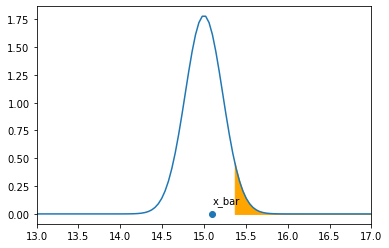

In [29]:
x_min = 13
x_max = 17

mean = pop_mean
std = pop_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

z_critical_right = pop_mean + (z_critical * std)

x1 = np.linspace(z_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the acceptance region
# i.e. Fail to Reject the Null Hypothesis

In [30]:
if(z > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [31]:
p_value = 1.0 - norm.cdf(np.abs(z))

print("p_value = ", p_value)

if(p_value < 0.05):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.32736042300928914
Fail to reject Null Hypothesis


In [ ]:
'''
Q-4: You have developed a new Machine Learning Application 
and claim that on average it takes less than 100 ms to predict for any future datapoint. 
How do you convince your client about this claim? 
'''

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: ? $$
Null Hypothesis (Status Quo): $$ H_0: ? $$

Step - 2:  
* Collect a sample of size n = 100
* Compute sample mean $$ \bar{x} = 97.5 $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: Left tailed z-test: $$ reject H_0 if ? $$

Step - 5.2: Compute p-value

In [32]:
# One Tail

alpha = 1 - 0.99

z_critical = norm.ppf(1 - alpha)

print(z_critical)

2.3263478740408408


In [33]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100
pop_std = 10

In [34]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

-2.5


Text(97.5, 0.02, 'x_bar')

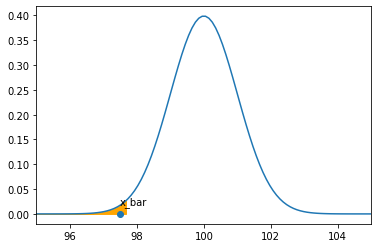

In [35]:
x_min = 95
x_max = 105

mean = pop_mean
std = pop_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

z_critical_left = pop_mean + (-z_critical * std)

x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis

In [36]:
if(z < -z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [37]:
p_value = 1.0 - norm.cdf(np.abs(z))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.006209665325776159
Reject Null Hypothesis
